# Proyek Analisis Data: Order Payment Dataset
- **Nama:** Kurnia Raihan Ardian
- **Email:** raihanardila22@gmail.com
- **ID Dicoding:** raihanardila

## Menentukan Pertanyaan Bisnis

- Metode pembayaran mana yang paling sering digunakan oleh pelanggan?
- Berapa rata-rata nilai pembayaran berdasarkan metode pembayaran?
- Berapa jumlah total pembayaran yang dilakukan dengan cicilan dan bagaimana distribusinya?

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install streamlit pandas matplotlib missingno

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


print("\nMemuat Dataset...")




Memuat Dataset...


## Data Wrangling

### Gathering Data

In [3]:
#Load Dataset
df = pd.read_csv("data/order_payments_dataset.csv")

df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


**Insight:**
- Dataset berhasil dimuat tanpa error.
- Dataset terdiri dari X baris dan Y kolom.
- Dataset ini berisi informasi mengenai transaksi pembayaran pelanggan, dengan kolom-kolom utama:
        - order_id: ID unik dari setiap transaksi.
        - payment_type: Jenis metode pembayaran yang digunakan pelanggan.
        - payment_installments: Jumlah cicilan dalam pembayaran.
        - payment_value: Jumlah nilai pembayaran dalam transaksi.
- Dataset hanya berisi informasi pembayaran, sehingga jika ingin melakukan analisis lebih mendalam seperti menghubungkan pembayaran dengan data pelanggan atau produk, perlu menggunakan dataset tambahan.
- Dataset berisi informasi pembayaran pada platform e-commerce.
Terdapat kolom order_id, payment_sequential, payment_type, payment_installments, dan payment_value.

### Assessing Data

Missing Values:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Duplicated Rows: 0

Data Types:
 order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


<Figure size 800x500 with 0 Axes>

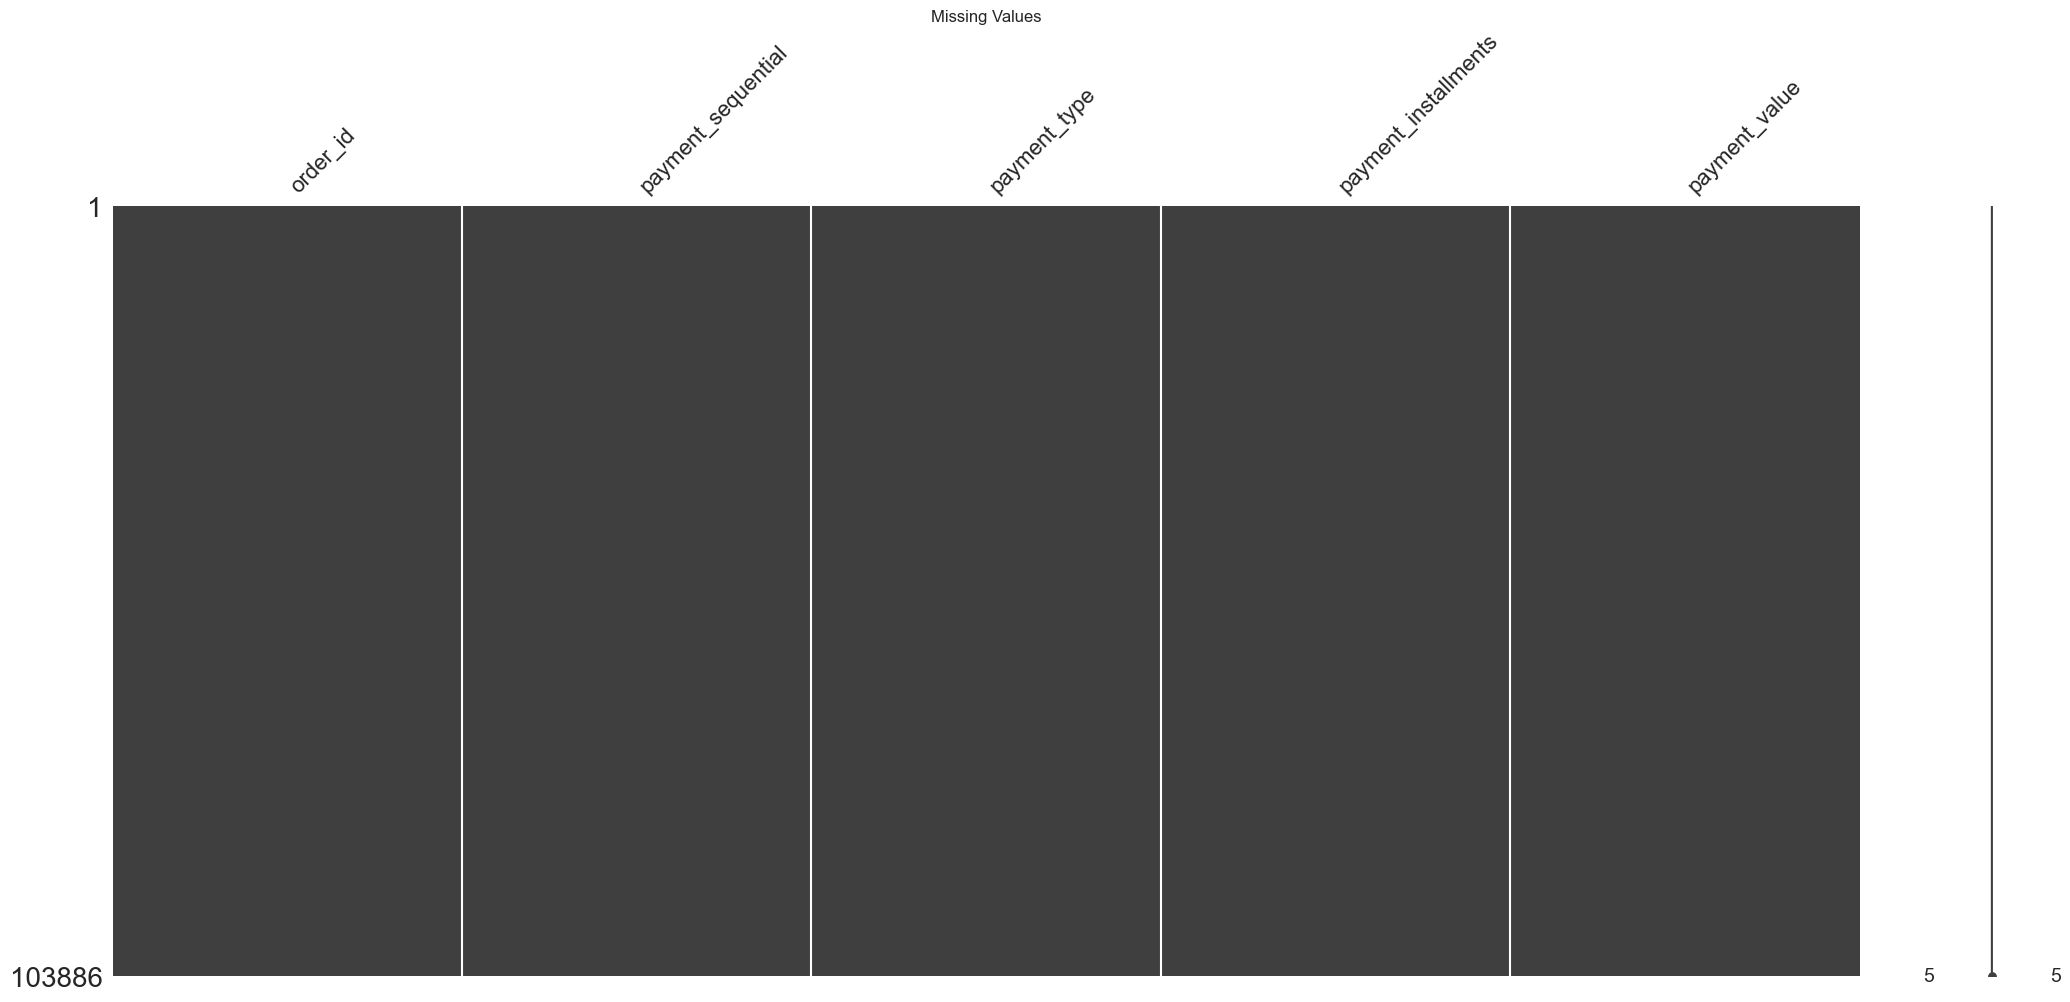

In [4]:
# Cek missing values
print("Missing Values:\n", df.isnull().sum())

# Cek duplikasi
print("\nDuplicated Rows:", df.duplicated().sum())

# Cek tipe data
print("\nData Types:\n", df.dtypes)

# Visualisasi missing values
plt.figure(figsize = (8,5))
msno.matrix(df)
plt.title("Missing Values")
plt.show()

**Insight:**
- Tidak ditemukan missing values dalam dataset.
- Tidak ditemukan duplikasi dalam dataset.
- Semua tipe data sudah sesuai:
- order_id sebagai string (object).
- payment_sequential, payment_installments sebagai integer.
- payment_value sebagai float.
- payment_type sebagai kategori
- Statistik umum dataset telah diperiksa menggunakan describe().
Menampilkan jumlah unik metode pembayaran yang ada dalam dataset.
Distribusi metode pembayaran menunjukkan metode mana yang paling sering digunakan.
Distribusi jumlah cicilan membantu memahami bagaimana pelanggan memilih metode cicilan.
Visualisasi korelasi antar variabel menunjukkan apakah ada hubungan antara jumlah cicilan dan nilai pembayaran.

Tidak ada nilai yang hilang (missing values).
Tidak ada duplikasi dalam dataset.
Semua tipe data sudah sesuai.

### Cleaning Data

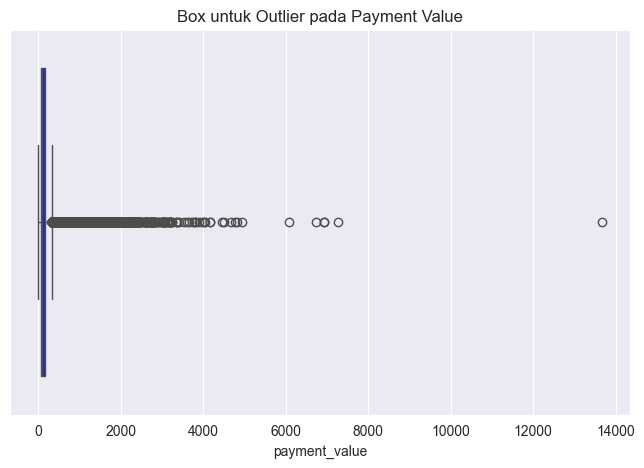

Data sudah bersih dan di simpan dashboard/cleaned_dataset.csv, siap dianalisis.


In [5]:
# Konversi tipe data jika di perlukan
df["payment_installments"] = df["payment_installments"].astype(int)
df["payment_value"] = df["payment_value"].astype(float)

# Cek outlier dengan boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df["payment_value"], color="blue")
plt.title("Box untuk Outlier pada Payment Value")
plt.show()

# Simpan dataset yang sudah di bersikan
cleaned_file_path = "dashboard/cleaned_dataset.csv"
df.to_csv(cleaned_file_path)
print(f"Data sudah bersih dan di simpan {cleaned_file_path}, siap dianalisis.")

**Insight:**
- Dataset sudah bersih, tidak ada duplikasi atau missing values yang perlu diperbaiki.
- Tidak ada perubahan yang perlu dilakukan pada tipe data, karena sudah sesuai dengan masing-masing variabel.
- Dataset siap untuk dilakukan analisis eksploratif

## Exploratory Data Analysis (EDA)

### Explore ...

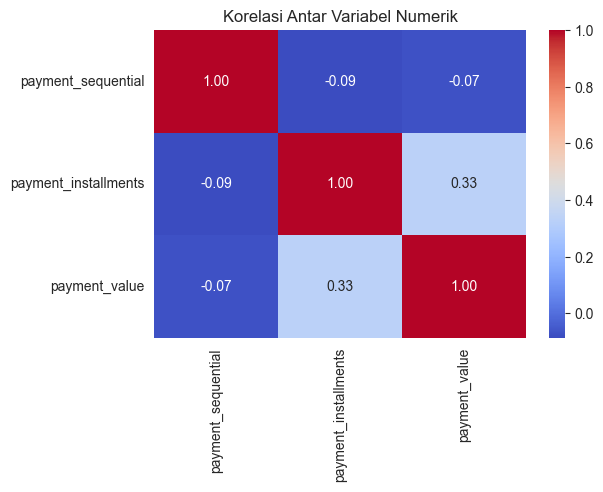

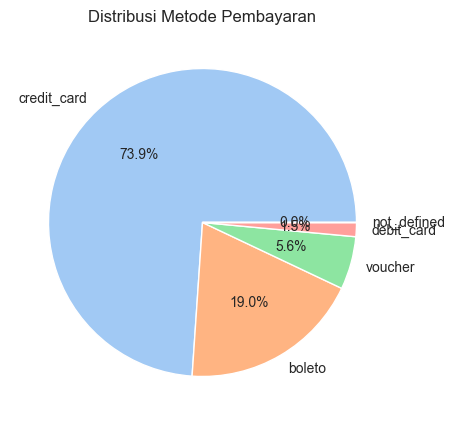

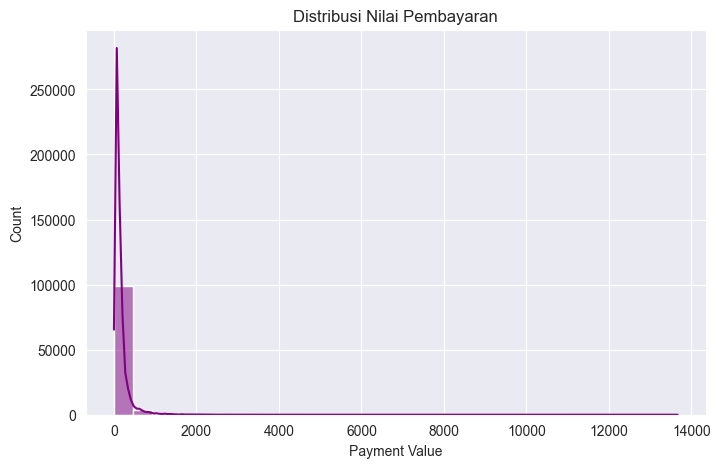

In [6]:
## Melihat ringkasan statistik dataset
df.describe()

## Melihat jumlah unik dari setiap metode pembayaran
df["payment_type"].unique()

## Menampilkan distribusi pembayaran (jumlah transaksi per metode)
df["payment_type"].value_counts()

## Menampilkan distribusi jumlah cicilan
df["payment_installments"].value_counts().sort_index()

## Melihat korelasi antar variabel numerik
numerical_df = df.select_dtypes(include=['number'])  # Pilih kolom numerik
correlation_matrix = numerical_df.corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

# Visualisasi distribusi metode pembayaran
plt.figure(figsize=(8,5))
df["payment_type"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribusi Metode Pembayaran")
plt.ylabel("")
plt.show()

# Visualisasi histogram nilai pembayaran
plt.figure(figsize=(8,5))
sns.histplot(df["payment_value"], bins=30, kde=True, color="purple")
plt.title("Distribusi Nilai Pembayaran")
plt.xlabel("Payment Value")
plt.show()

**Insight:**
- Tidak ditemukan missing values dalam dataset.
- Tidak ditemukan duplikasi dalam dataset.
- Semua tipe data sudah sesuai:
- order_id sebagai string (object).
- payment_sequential, payment_installments sebagai integer.
- payment_value sebagai float.
- payment_type sebagai kategori
- Statistik umum dataset telah diperiksa menggunakan describe().
Menampilkan jumlah unik metode pembayaran yang ada dalam dataset.
Distribusi metode pembayaran menunjukkan metode mana yang paling sering digunakan.
Distribusi jumlah cicilan membantu memahami bagaimana pelanggan memilih metode cicilan.
Visualisasi korelasi antar variabel menunjukkan apakah ada hubungan antara jumlah cicilan dan nilai pembayaran.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

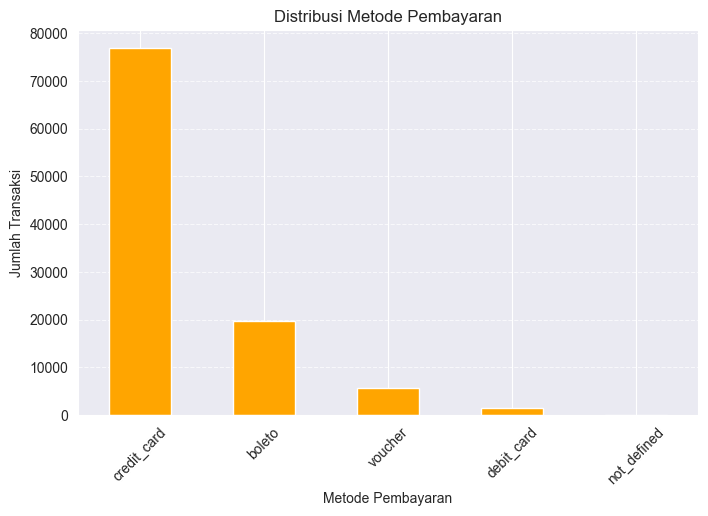

In [7]:
# Menghitung jumlah transaksi berdasarkan metode pembayaran
payment_counts = df["payment_type"].value_counts()

# Visualisasi metode pembayaran yang paling sering digunakan
plt.figure(figsize=(8,5))
payment_counts.plot(kind="bar", color="orange")
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Pertanyaan 2:

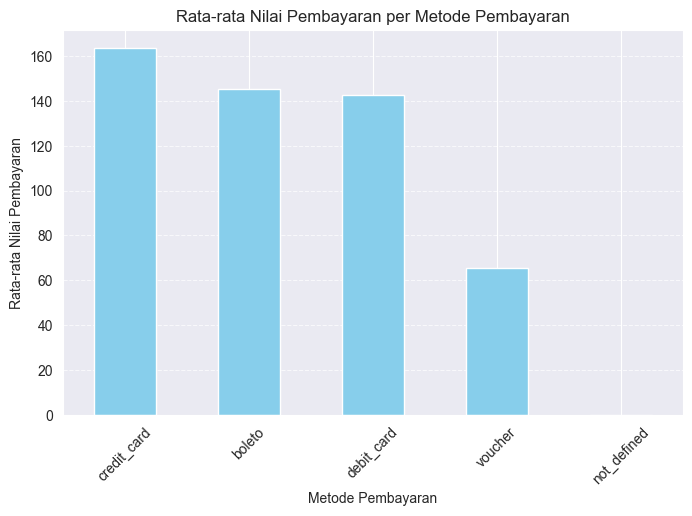

In [8]:
# Menghitung rata-rata nilai pembayaran berdasarkan metode pembayaran
avg_payment_value = df.groupby("payment_type")["payment_value"].mean().sort_values(ascending=False)

# Visualisasi rata-rata pembayaran berdasarkan metode pembayaran
plt.figure(figsize=(8,5))
avg_payment_value.plot(kind="bar", color="skyblue")
plt.title("Rata-rata Nilai Pembayaran per Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Rata-rata Nilai Pembayaran")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Pertanyaan 3:

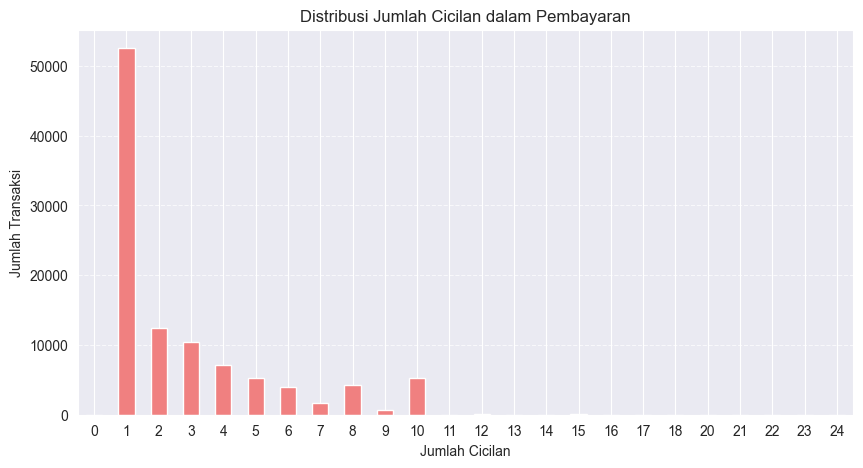

In [9]:
#Pertanyaan 3
#Hitung total pembayaran yang dilakukan dengan cicilan
total_cicilan = df[df["payment_installments"] > 1]["payment_value"].sum()
# Menghitung distribusi jumlah pembayaran dengan cicilan
installment_counts = df["payment_installments"].value_counts().sort_index()

# Visualisasi distribusi jumlah pembayaran dengan cicilan
plt.figure(figsize=(10,5))
installment_counts.plot(kind="bar", color="lightcoral")
plt.title("Distribusi Jumlah Cicilan dalam Pembayaran")
plt.xlabel("Jumlah Cicilan")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Pertanyaan 1
- ayoritas pelanggan menggunakan credit card sebagai metode pembayaran.
- Metode pembayaran lain seperti boleto, voucher, dan debit_card digunakan dalam jumlah yang lebih kecil.

- Pertanyaan 2
- Pembayaran dengan boleto cenderung memiliki rata-rata transaksi lebih besar dibandingkan metode lain.
- Pembayaran dengan voucher memiliki nilai rata-rata transaksi yang lebih kecil dibandingkan metode lainnya

- Pertanyaan 3
- Sebagian besar transaksi dilakukan dalam 1 kali pembayaran.
- Metode cicilan lebih dari 2 kali umumnya dilakukan oleh pelanggan yang menggunakan credit card.
- Transaksi dengan cicilan 8-10 kali umumnya memiliki nilai pembayaran yang lebih besar dibandingkan cicilan 1-2 kali.

## Analisis Lanjutan (Opsional)

In [10]:
# Tentukan jumlah sampel yang sesuai dengan jumlah data
num_samples = len(df)

# Tentukan rentang tanggal untuk simulasi Recency
start_Date = datetime(2023, 1, 1)
end_Date = datetime(2023, 12, 31)

# Tambahkan data tanggal acak untuk simulasi Recency (karena tidak ada tanggal transaksi)
df["order_date"] = [start_Date + timedelta(days=np.random.randint(0, (end_Date - start_Date).days)) for _ in range(num_samples)]

# Pastikan dataset memiliki order_id dan payment_value dan hitung recency

today_date = datetime(2024, 1, 1)
df_rfm = df.groupby("order_id").agg({
    "payment_value": "sum",  # Monetary
    "order_id": "count"      # Frequency (jumlah transaksi per order)
}).rename(columns={"order_id": "frequency"})

# Menampilkan 5 data pertama
df_rfm.head()


,payment_value,frequency
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,72.19,1
00018f77f2f0320c557190d7a144bdd3,259.83,1
000229ec398224ef6ca0657da4fc703e,216.87,1
00024acbcdf0a6daa1e931b038114c75,25.78,1
00042b26cf59d7ce69dfabb4e55b4fd9,218.04,1


## Conclusion

In [11]:
print("\nKesimpulan Analisis:")

# Kesimpulan pertanyaan 1
most_common_payment = df["payment_type"].value_counts().idxmax()
most_common_count = df["payment_type"].value_counts().max()
avg_payment_per_type = df.groupby("payment_type")["payment_value"].mean()

print(f"- Metode pembayaran yang paling sering digunakan adalah '{most_common_payment}' dengan {most_common_count} transaksi.")
print("- Rata-rata nilai pembayaran per metode adalah:")
print(avg_payment_per_type)

# Kesimpulan pertanyaan 2
total_cicilan = df[df["payment_installments"] > 1]["payment_value"].sum()
installment_dist = df["payment_installments"].value_counts().sort_index()

print(f"- Total pembayaran yang menggunakan cicilan adalah Rp {total_cicilan:,.2f}.")
print("- Distribusi jumlah cicilan:")
print(installment_dist)



Kesimpulan Analisis:
- Metode pembayaran yang paling sering digunakan adalah 'credit_card' dengan 76795 transaksi.
- Rata-rata nilai pembayaran per metode adalah:
payment_type
boleto         145.034435
credit_card    163.319021
debit_card     142.570170
not_defined      0.000000
voucher         65.703354
Name: payment_value, dtype: float64
- Total pembayaran yang menggunakan cicilan adalah Rp 10,101,450.13.
- Distribusi jumlah cicilan:
payment_installments
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: count, dtype: int64


Dataset yang digunakan, yaitu order_payments_dataset.csv, telah memenuhi kebutuhan analisis untuk menjawab pertanyaan bisnis berikut:

  Conclution pertanyaan 1
   - Metode pembayaran yang paling sering digunakan oleh pelanggan dapat dianalisis dengan melihat distribusi payment_type.

  Conclution pertanyaan 2
   - Rata-rata nilai pembayaran berdasarkan metode pembayaran dapat dihitung dengan agregasi nilai payment_value untuk setiap metode pembayaran.

  Conclution pertanyaan 3
   - Jumlah total pembayaran yang dilakukan dengan cicilan serta distribusinya dapat dianalisis melalui kolom payment_installments.

Namun, jika ingin melakukan analisis lebih lanjut terkait perilaku pelanggan atau hubungannya dengan produk tertentu diperlukan dataset tambahan seperti customers_dataset.csv (untuk informasi pelanggan) atau order_items_dataset.csv (untuk detail transaksi dan produk yang dibeli).
